# Exploratory Data Analysis

### This is a Exploratory Data Analysis based on the Assembly Election of India from 1990 - 2024

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset
election_df = pd.read_csv("All_States_AE.csv",low_memory = False)

In [4]:
#Display first few rows
print("Assembly Election Data of All States Of INDIA", election_df.head())

Assembly Election Data of All States Of INDIA        State_Name  Assembly_No  Constituency_No  Year  month  DelimID  \
0  Andhra_Pradesh           15                1  2019    4.0        4   
1  Andhra_Pradesh           15                1  2019    4.0        4   
2  Andhra_Pradesh           15                1  2019    4.0        4   
3  Andhra_Pradesh           15                1  2019    4.0        4   
4  Andhra_Pradesh           15                1  2019    4.0        4   

   Poll_No  Position         Candidate   Sex  ... No_Terms  Turncoat  \
0        0         1    ASHOK BENDALAM  MALE  ...      2.0     False   
1        0         2     PIRIYA SAIRAJ  MALE  ...      1.0      True   
2        0         3       DASARI RAJU  MALE  ...      0.0     False   
3        0         4              NOTA   NaN  ...      NaN       NaN   
4        0         5  ESWARA RAO KOLLI  MALE  ...      0.0     False   

   Incumbent Recontest       MyNeta_education  \
0       True      True  Graduate 

In [5]:
print(election_df.shape)

(483565, 47)


In [6]:
#Show All Coloumn Names
print(election_df.columns)

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'DelimID', 'Poll_No', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Age', 'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'District_Name', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'MyNeta_education',
       'TCPD_Prof_Main', 'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second',
       'TCPD_Prof_Second_Desc', 'Election_Type'],
      dtype='object')


In [7]:
print(election_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483565 entries, 0 to 483564
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   State_Name              483565 non-null  object 
 1   Assembly_No             483565 non-null  int64  
 2   Constituency_No         483565 non-null  int64  
 3   Year                    483565 non-null  int64  
 4   month                   469756 non-null  float64
 5   DelimID                 483565 non-null  int64  
 6   Poll_No                 483565 non-null  int64  
 7   Position                483565 non-null  int64  
 8   Candidate               483565 non-null  object 
 9   Sex                     470708 non-null  object 
 10  Party                   483314 non-null  object 
 11  Votes                   483524 non-null  float64
 12  Age                     159193 non-null  float64
 13  Candidate_Type          138762 non-null  object 
 14  Valid_Votes         

In [8]:
#Checking of Missing Values
election_df.isnull().sum().sort_values(ascending = False)

TCPD_Prof_Second_Desc     481597
TCPD_Prof_Second          470262
TCPD_Prof_Main_Desc       458026
Last_Party_ID             394254
Last_Constituency_Name    393764
Last_Party                393764
Same_Constituency         393743
Same_Party                393743
MyNeta_education          363609
TCPD_Prof_Main            360593
Sub_Region                347131
Candidate_Type            344803
District_Name             339370
Age                       324372
Party_Type_TCPD            16985
month                      13809
Sex                        12857
No_Terms                    8468
pid                         8468
Contested                   8468
Deposit_Lost                8468
Turncoat                    8468
Incumbent                   8468
Recontest                   8468
Party_ID                    4083
Constituency_Type           1335
Vote_Share_Percentage        308
Margin_Percentage            308
ENOP                         308
Turnout_Percentage           259
Electors  

In [9]:
#Removing Votes Coloumn
election_df = election_df.dropna(subset=['Votes'])

In [10]:
election_df = election_df.copy()
election_df['Party'] = election_df['Party'].fillna("Unknown")

In [11]:
election_df['Sex'] = election_df['Sex'].fillna("Unknown")

In [12]:
election_df['Turnout_Percentage'] = election_df['Turnout_Percentage'].fillna(election_df['Turnout_Percentage'].median())

In [13]:
election_df['Vote_Share_Percentage'] = election_df['Vote_Share_Percentage'].fillna((election_df['Votes'] / election_df['Valid_Votes']) * 100)

In [14]:
election_df['Constituency_Type'] = election_df['Constituency_Type'].fillna("GEN")

In [15]:
#After removing and changing all errors
election_df.isnull().sum().sort_values(ascending=False)

TCPD_Prof_Second_Desc     481556
TCPD_Prof_Second          470221
TCPD_Prof_Main_Desc       457985
Last_Party_ID             394218
Last_Party                393728
Last_Constituency_Name    393728
Same_Party                393707
Same_Constituency         393707
MyNeta_education          363568
TCPD_Prof_Main            360552
Sub_Region                347091
Candidate_Type            344762
District_Name             339330
Age                       324331
Party_Type_TCPD            16984
month                      13768
No_Terms                    8467
Turncoat                    8467
Incumbent                   8467
Recontest                   8467
Contested                   8467
pid                         8467
Deposit_Lost                8467
Party_ID                    4082
Margin_Percentage            267
ENOP                         267
Electors                     256
Vote_Share_Percentage        219
last_poll                      0
State_Name                     0
Margin    

In [16]:
winners_df = election_df[election_df['Position'] == 1]

In [17]:
runnerupparties_df = election_df[election_df['Position'] == 2]

In [18]:
constituency_summary = winners_df[['State_Name','Year','Constituency_No',
                                   'Constituency_Name','Party','Votes','Margin']]
constituency_summary.head()
#This only shows State_Name - Andhra Pradesh becuase while we have written "constituency_summary.head()" 
#while it showing only 5 rows that'swhy it showing this.

,State_Name,Year,Constituency_No,Constituency_Name,Party,Votes,Margin
0,Andhra_Pradesh,2019,1,ICHCHAPURAM,TDP,79992.0,7145.0
7,Andhra_Pradesh,2019,2,PALASA,YSRCP,76603.0,16247.0
17,Andhra_Pradesh,2019,3,TEKKALI,TDP,87658.0,8545.0
26,Andhra_Pradesh,2019,4,PATHAPATNAM,YSRCP,76941.0,15551.0
35,Andhra_Pradesh,2019,5,SRIKAKULAM,YSRCP,84084.0,5777.0


In [19]:
election_df['State_Name'].unique()

array(['Andhra_Pradesh', 'Bihar', 'Meghalaya', 'Madhya_Pradesh',
       'Mizoram', 'Tamil_Nadu', 'Manipur', 'Mysore', 'Kerala',
       'Jharkhand', 'Tripura', 'Karnataka', 'Assam', 'Delhi',
       'West_Bengal', 'Himachal_Pradesh', 'Maharashtra', 'Uttarakhand',
       'Punjab', 'Sikkim', 'Nagaland', 'Jammu_&_Kashmir',
       'Arunachal_Pradesh', 'Haryana', 'Chhattisgarh', 'Madras',
       'Goa_Daman_&_Diu', 'Rajasthan', 'Puducherry', 'Uttar_Pradesh',
       'Goa', 'Odisha', 'Gujarat', 'Telangana'], dtype=object)

In [20]:
election_df['State_Name'].value_counts().head(40)
#Here is the .head(50) becuase if we don't write atleast 40 it not showing all states name

State_Name
Uttar_Pradesh        84714
Bihar                54667
Maharashtra          34381
Madhya_Pradesh       33696
Tamil_Nadu           30728
Andhra_Pradesh       27057
West_Bengal          23907
Karnataka            23719
Rajasthan            22546
Gujarat              19084
Haryana              15039
Odisha               13215
Assam                12216
Kerala               11995
Punjab               11807
Delhi                 7199
Jammu_&_Kashmir       5850
Jharkhand             5636
Himachal_Pradesh      5042
Chhattisgarh          4462
Manipur               4156
Uttarakhand           4002
Telangana             3875
Meghalaya             3636
Tripura               3357
Nagaland              2726
Puducherry            2707
Mysore                2266
Mizoram               2133
Goa                   2093
Arunachal_Pradesh     1615
Madras                1586
Sikkim                1475
Goa_Daman_&_Diu        937
Name: count, dtype: int64

In [21]:
constituency_summary.groupby('State_Name').head(1)

,State_Name,Year,Constituency_No,Constituency_Name,Party,Votes,Margin
0,Andhra_Pradesh,2019,1,ICHCHAPURAM,TDP,79992.0,7145.0
27057,Bihar,2020,1,VALMIKI NAGAR,JD(U),74906.0,21585.0
81724,Meghalaya,2023,1,NARTIANG,NPP,16969.0,2123.0
85360,Madhya_Pradesh,2018,1,SHEOPUR,INC,98580.0,41710.0
119056,Mizoram,2018,1,HACHHEK,INC,6202.0,366.0
121189,Tamil_Nadu,2021,1,GUMMIDIPUNDI,DMK,126452.0,50938.0
151917,Manipur,2022,1,KHUNDRAKPAM,INC,12211.0,215.0
156074,Mysore,1972,1,AURAD,IND,22431.0,3861.0
158340,Kerala,2021,1,MANJESHWAR,IUML,65758.0,745.0
170335,Jharkhand,2019,1,RAJMAHAL,BJP,88904.0,12372.0


In [22]:
winners_df.head()

,State_Name,Assembly_No,Constituency_No,Year,month,DelimID,Poll_No,Position,Candidate,Sex,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andhra_Pradesh,15,1,2019,4.0,4,0,1,ASHOK BENDALAM,MALE,...,2.0,False,True,True,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN,State Assembly Election (AE)
7,Andhra_Pradesh,15,2,2019,4.0,4,0,1,APPALARAJU SEEDIRI,MALE,...,1.0,False,False,False,Post Graduate,Liberal Profession or Professional,Doctor,NaN,NaN,State Assembly Election (AE)
17,Andhra_Pradesh,15,3,2019,4.0,4,0,1,ATCHANNAIDU KINJARAPU,MALE,...,5.0,False,True,True,12th Pass,Politics,Minister,NaN,NaN,State Assembly Election (AE)
26,Andhra_Pradesh,15,4,2019,4.0,4,0,1,REDDY SHANTHI,FEMALE,...,1.0,False,False,False,10th Pass,Business,NaN,NaN,NaN,State Assembly Election (AE)
35,Andhra_Pradesh,15,5,2019,4.0,4,0,1,DHARMANA PRASADA RAO,MALE,...,5.0,False,False,True,12th Pass,Agriculture,NaN,Social Work,NaN,State Assembly Election (AE)


In [23]:
# Party Seat Share of previous + current
party_seat_share = winners_df['Party'].value_counts().head(20)
party_seat_share
# There are 406 length where it shows .
#In our India there is 406 Parties fromed in Assembly Election from 1962 - 2024

Party
INC       17812
BJP        7969
IND        3387
CPM        2814
JNP        2015
INC(I)     1893
DMK        1291
JD         1236
CPI        1144
TDP         991
SP          933
AITC        761
BSP         728
ADK         605
ADMK        594
BJS         554
SWA         515
SAD         497
RJD         476
BJD         471
Name: count, dtype: int64

In [24]:
# Created Winnereas Data Frame (Only Winners)
winners_df =  election_df[election_df["Position"] == 1]

# Create constituency summary properly
constituency_summary = winners_df[['State_Name','Year','Constituency_No',
                                   'Constituency_Name','Party','Votes','Margin']]

# Show the first few rows
constituency_summary.head()

,State_Name,Year,Constituency_No,Constituency_Name,Party,Votes,Margin
0,Andhra_Pradesh,2019,1,ICHCHAPURAM,TDP,79992.0,7145.0
7,Andhra_Pradesh,2019,2,PALASA,YSRCP,76603.0,16247.0
17,Andhra_Pradesh,2019,3,TEKKALI,TDP,87658.0,8545.0
26,Andhra_Pradesh,2019,4,PATHAPATNAM,YSRCP,76941.0,15551.0
35,Andhra_Pradesh,2019,5,SRIKAKULAM,YSRCP,84084.0,5777.0


In [25]:
#Party Seat Share 
# This Coloumn shows top 20 parties won in Assembly Election
party_seat_share = winners_df['Party'].value_counts().head(20)
party_seat_share

Party
INC       17812
BJP        7969
IND        3387
CPM        2814
JNP        2015
INC(I)     1893
DMK        1291
JD         1236
CPI        1144
TDP         991
SP          933
AITC        761
BSP         728
ADK         605
ADMK        594
BJS         554
SWA         515
SAD         497
RJD         476
BJD         471
Name: count, dtype: int64

In [26]:
state_party_wins = (
    winners_df
    .groupby(['State_Name','Year','Party'])
    .size()
    .reset_index(name='Seats')
)
state_party_wins.head()

,State_Name,Year,Party,Seats
0,Andhra_Pradesh,1962,CPI,51
1,Andhra_Pradesh,1962,INC,177
2,Andhra_Pradesh,1962,IND,51
3,Andhra_Pradesh,1962,SOC,2
4,Andhra_Pradesh,1962,SWA,19


In [27]:
top_party_per_state = state_party_wins.loc[
    state_party_wins.groupby(['State_Name','Year'])['Seats'].idxmax()
]

top_party_per_state.sort_values('Seats', ascending=False).head(20)

,State_Name,Year,Party,Seats
2911,Uttar_Pradesh,1977,JNP,352
3078,Uttar_Pradesh,2017,BJP,312
2917,Uttar_Pradesh,1980,INC(I),310
2934,Uttar_Pradesh,1985,INC,269
3093,Uttar_Pradesh,2022,BJP,255
1485,Madhya_Pradesh,1985,INC,251
1476,Madhya_Pradesh,1980,INC(I),250
2858,Uttar_Pradesh,1962,INC,249
1471,Madhya_Pradesh,1977,JNP,230
3066,Uttar_Pradesh,2012,SP,224


In [28]:
# Finding earliest vote held by each state
first_year_state = (winners_df.groupby("State_Name")['Year']
                   .min()
                   .reset_index())
first_year_state_coloumns = ['State_Name','First_Year']
first_year_state.head(50)

,State_Name,Year
0,Andhra_Pradesh,1962
1,Arunachal_Pradesh,1978
2,Assam,1962
3,Bihar,1962
4,Chhattisgarh,2003
5,Delhi,1972
6,Goa,1989
7,Goa_Daman_&_Diu,1967
8,Gujarat,1962
9,Haryana,1967


In [31]:
print(election_df.columns.tolist())

['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month', 'DelimID', 'Poll_No', 'Position', 'Candidate', 'Sex', 'Party', 'Votes', 'Age', 'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name', 'Constituency_Type', 'District_Name', 'Sub_Region', 'N_Cand', 'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent', 'Recontest', 'MyNeta_education', 'TCPD_Prof_Main', 'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc', 'Election_Type']


In [39]:
election_df['Seats_Won'] = (election_df['Position'] == 1).astype(int)
state_party_summary = (
    election_df.groupby(['State_Name', 'Party'])['Seats_Won']
    .sum()
    .reset_index()
    .sort_values(['State_Name', 'Seats_Won'], ascending=[True, False])
)
top_party_per_state = state_party_summary.groupby('State_Name').head(1)
top_party_per_state.head(40)

,State_Name,Party,Seats_Won
60,Andhra_Pradesh,INC,1380
229,Arunachal_Pradesh,INC,279
299,Assam,INC,760
592,Bihar,INC,1061
963,Chhattisgarh,INC,187
1144,Delhi,INC,258
1342,Goa,INC,133
1377,Goa_Daman_&_Diu,MAG,66
1414,Gujarat,BJP,996
1714,Haryana,INC,441


In [47]:
year_filter = 1999
df_year = election_df[election_df['Year'] == year_filter]

In [48]:
df_year['Seats_Won'] = (df_year['Position'] == 1).astype(int)

C:\Users\abhir\AppData\Local\Temp\ipykernel_1532\4095204399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Seats_Won'] = (df_year['Position'] == 1).astype(int)


In [49]:
state_party_summary = (
    df_year.groupby(['State_Name', 'Party'])['Seats_Won']
    .sum()
    .reset_index()
    .sort_values(['State_Name', 'Seats_Won'], ascending=[True, False])
)

top_party_per_state = state_party_summary.groupby('State_Name').head(1)

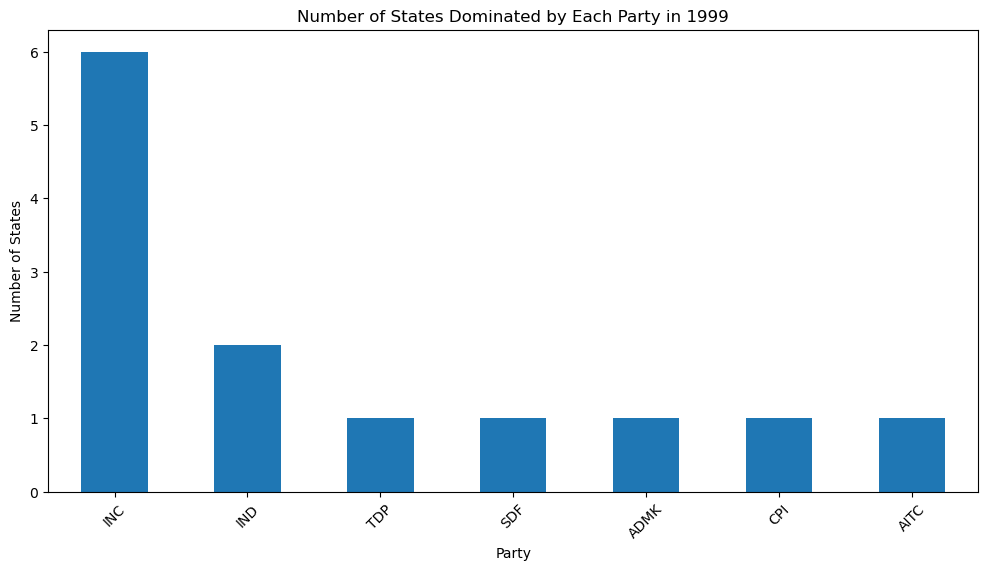

In [50]:
plt.figure(figsize=(12,6))
top_party_per_state['Party'].value_counts().plot(kind='bar')

plt.title(f'Number of States Dominated by Each Party in {year_filter}')
plt.xlabel('Party')
plt.ylabel('Number of States')
plt.xticks(rotation=45)
plt.show()

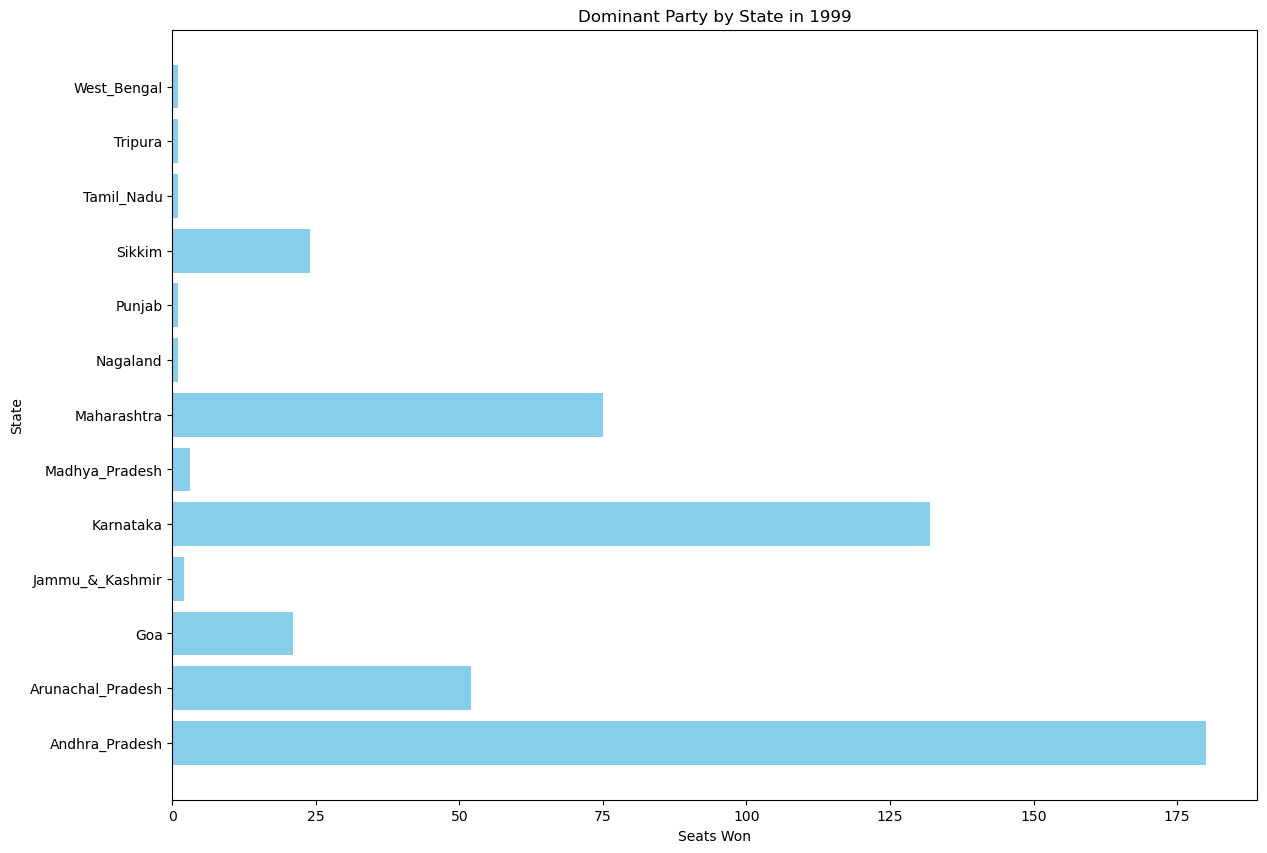

In [51]:
plt.figure(figsize=(14,10))

# Sort alphabetically for clean view
top_party_per_state_sorted = top_party_per_state.sort_values('State_Name')

plt.barh(top_party_per_state_sorted['State_Name'],
         top_party_per_state_sorted['Seats_Won'],
         color='skyblue')

plt.title(f'Dominant Party by State in {year_filter}')
plt.xlabel('Seats Won')
plt.ylabel('State')
plt.show()

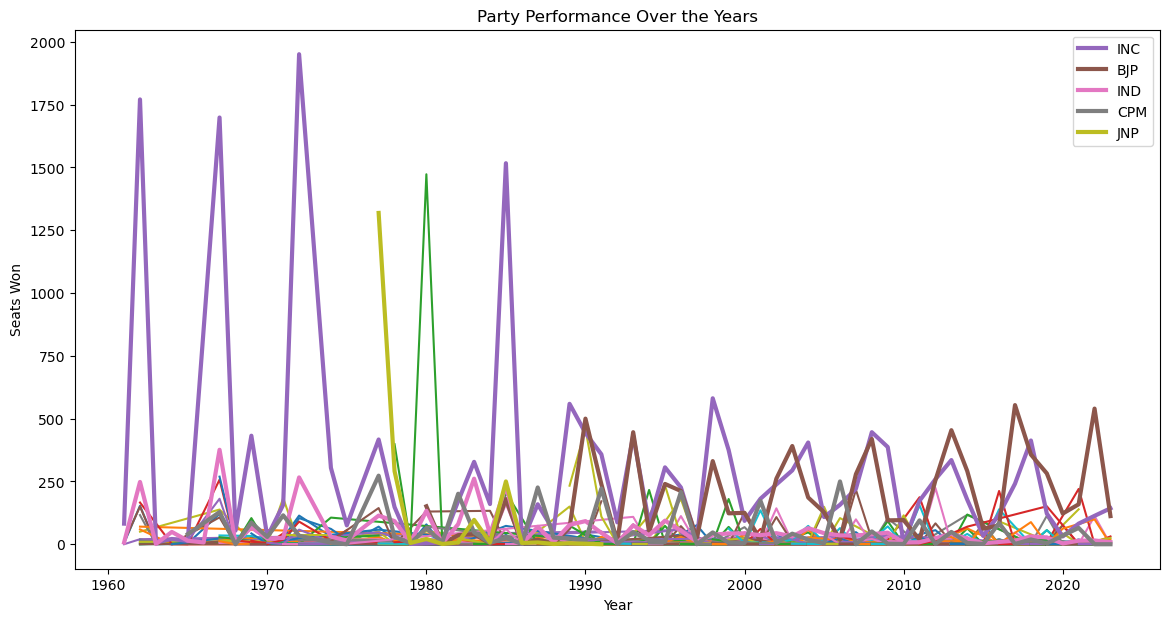

In [61]:
# Party Performance Trend from 1990 - 2024
party_trends = (
    election_df.groupby(['Year', 'Party'])['Seats_Won']
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 7))

# Plot lines WITHOUT labels
for party in party_trends['Party'].unique():
    party_data = party_trends[party_trends['Party'] == party]
    plt.plot(party_data['Year'], party_data['Seats_Won'])

# Now add ONLY 5 legend labels manually
top5_parties = party_trends.groupby('Party')['Seats_Won'].sum().sort_values(ascending=False).head(5).index

# Create legend entries only for top 5 parties
for party in top5_parties:
    party_data = party_trends[party_trends['Party'] == party]
    plt.plot(party_data['Year'], party_data['Seats_Won'], label=party, linewidth=3)

plt.title("Party Performance Over the Years")
plt.xlabel("Year")
plt.ylabel("Seats Won")
plt.legend()

plt.show()

In [62]:
# Swing Analysis

In [63]:
winners = election_df[election_df['Position'] == 1][[
    'State_Name', 'Constituency_No', 'Year', 'Party', 'Vote_Share_Percentage',
    'Votes', 'Last_Party', 'Same_Party'
]]

In [68]:
seat_swing = winners.groupby(['State_Name', 'Year'])['Same_Party'].mean().reset_index()
seat_swing['Swing_Percentage'] = (1 - seat_swing['Same_Party']) * 100
seat_swing.head()

,State_Name,Year,Same_Party,Swing_Percentage
0,Andhra_Pradesh,1962,NaN,NaN
1,Andhra_Pradesh,1964,NaN,NaN
2,Andhra_Pradesh,1965,NaN,NaN
3,Andhra_Pradesh,1967,0.866667,13.333333
4,Andhra_Pradesh,1968,NaN,NaN


In [71]:
party_swing = (
    winners.groupby(['Party', 'Year'])['Vote_Share_Percentage']
    .mean()
    .reset_index()
)

party_swing['Vote_Swing'] = party_swing.groupby('Party')['Vote_Share_Percentage'].diff()

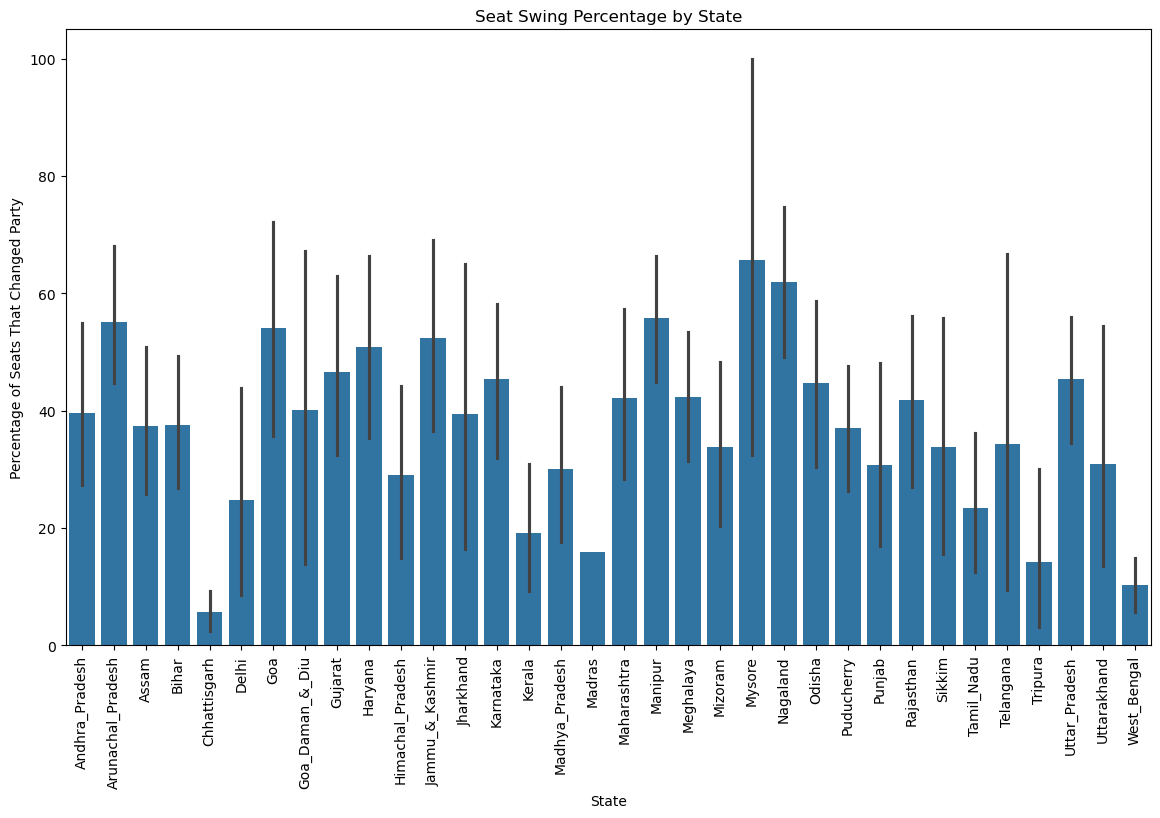

In [72]:
plt.figure(figsize=(14,8))
sns.barplot(data=seat_swing, x='State_Name', y='Swing_Percentage')
plt.xticks(rotation=90)
plt.title('Seat Swing Percentage by State')
plt.ylabel('Percentage of Seats That Changed Party')
plt.xlabel('State')
plt.show()

C:\Users\abhir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


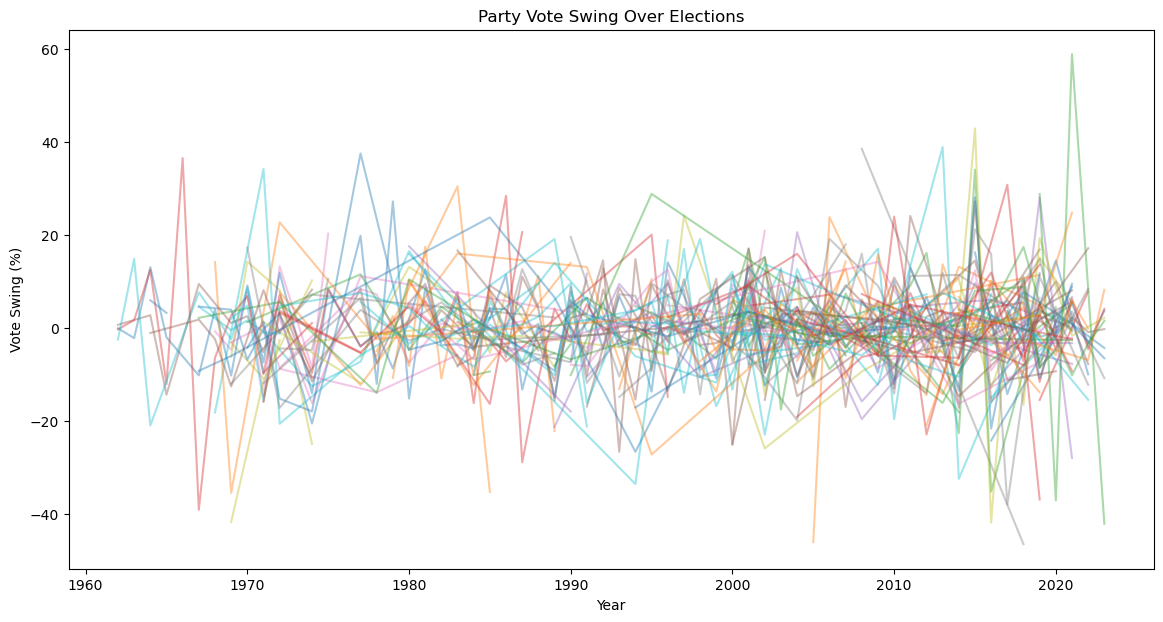

In [73]:
plt.figure(figsize=(14,7))
for party in party_swing['Party'].unique():
    pdata = party_swing[party_swing['Party'] == party]
    plt.plot(pdata['Year'], pdata['Vote_Swing'], label=party, alpha=0.4)

plt.title('Party Vote Swing Over Elections')
plt.xlabel('Year')
plt.ylabel('Vote Swing (%)')
plt.legend([],[],frameon=False)   # remove giant legend
plt.show()